In [2]:
import numpy as np

In [3]:
import unyt
# Use MPC, 1e14 Msun, and 1 Gyr for code units
unyt.define_unit("code_length",(1,unyt.Mpc))
unyt.define_unit("code_mass",(1e14,unyt.Msun))
unyt.define_unit("code_time",(1,unyt.Gyr))

In [4]:
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import colors
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

SMALL_SIZE = 7
MEDIUM_SIZE = 9
BIGGER_SIZE = 11

matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Physics of Plasmas figure sizes
OneColWidth = 3.37
TwoColWidth = 6.69


In [5]:
##root_dir = "/u/glines/scratch/magnetized-clusters/cluster_testing/feedback_suite"
#sim_labels = {"glmmhd.uniform_b_field":"Dedner Uniform B","glmmhd.hydro":"Dedner No B","euler.hydro":"Euler No B","dipole.all_mechs":"Dipole","dipole.fixed_tower":"Dipole+Tower","all_mechs":"Initial Magnetic Tower"}
#sim_names = sim_labels.keys()

In [12]:
root_dir = "/u/glines/scratch/magnetized-clusters/cluster_testing/feedback_suite"
sim_labels = {"all_mechs":"All Mechs","thermal":"Thermal Only","kinetic":"Kinetic Only","no_thermal":"No Thermal","no_kinetic":"No Kinetic","no_magnetic":"No Magnetic"}
sim_names = sim_labels.keys()

FileNotFoundError: /u/glines/scratch/magnetized-clusters/cluster_testing/feedback_suite/small.thermal/parthenon.hst not found.

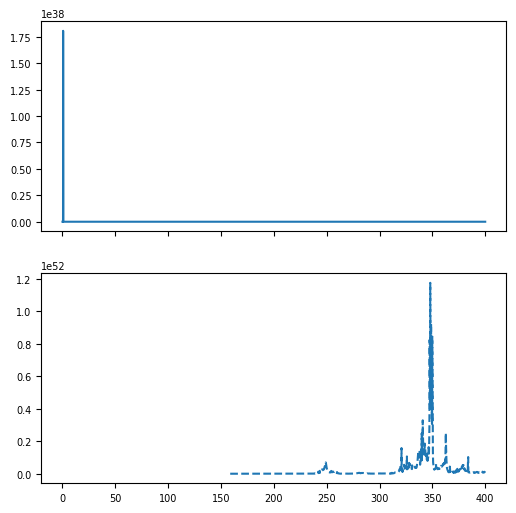

In [13]:
from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

fig,axes = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(6,6),squeeze=False)

for sim_name in sim_names:
    history_file = np.loadtxt(f"{root_dir}/small.{sim_name}/parthenon.hst")
    
    
    time = unyt.unyt_array(history_file[:,0],"code_time")
    dt = unyt.unyt_array(history_file[:,1],"code_time")
    
    relDivB = history_file[:,9]
    cold_mass_accreted = unyt.unyt_array(history_file[:,12],"code_mass")
    
    agn_power = 0.001 * cold_mass_accreted*unyt.c**2/dt
    
    axes[0,0].plot(time.in_units("Myr"),relDivB,next(linecycler),label=sim_labels[sim_name])
    
    non_zero_mask = (agn_power != 0)
    
    axes[1,0].plot(time[non_zero_mask].in_units("Myr"),
                   agn_power[non_zero_mask].in_units("erg/s"),next(linecycler),label=sim_labels[sim_name])
    
axes[0,0].set_yscale("log")
axes[0,0].set_ylabel(r"$\sum |\nabla \cdot \mathbf{B}|/|\mathbf{B}|$")
axes[0,0].set_ylim(1e-5,1e4)
axes[0,0].grid()

axes[1,0].set_yscale("log")
axes[1,0].set_ylabel("AGN Power [erg/s]")

axes[1,0].set_xlabel("Time [Myr]")
axes[1,0].grid()

axes[1,0].legend()
plt.savefig("divB_debugging_history.png")
    

In [ ]:
relDivB